In [1]:
#importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
#loading train data
df=pd.read_csv('training.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [4]:
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [5]:
df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [6]:
df.shape

(7049, 31)

In [7]:
df.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [8]:
df['Image'][0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [9]:
#function to show image
def draw(im):
    img=im.reshape((96,96))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.show()

In [10]:
#calculating null values
df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [11]:
#filling null values with ffill method

df.fillna(method='ffill',inplace=True)

In [12]:
df.shape

(7049, 31)

In [13]:
df.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,...,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,66.358588,37.649140,30.306631,37.975901,59.224060,36.675731,73.746775,35.619961,37.214171,38.942849,...,48.374186,62.715884,69.586932,73.195985,33.799680,76.964546,50.425299,74.982529,48.565976,78.979256
std,3.447098,3.152072,3.083087,3.032590,1.537961,1.581946,1.961901,2.184829,1.393110,1.470456,...,4.280038,5.720567,4.932241,3.242852,2.350229,2.578721,2.543271,3.294983,4.266848,5.406621
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082643,35.900605,28.782316,36.327178,59.255347,36.065143,73.942694,34.624653,37.478531,39.355685,...,46.602370,59.292697,65.731401,71.862041,34.232759,77.339429,49.471414,75.963592,46.571821,75.553726
50%,66.493907,37.526919,30.253135,37.812736,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,...,48.424713,63.451421,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,48.588662,78.704640
75%,68.024628,39.254400,31.768407,39.565928,59.255347,36.499692,73.942694,35.902613,37.478531,39.398041,...,50.330437,66.492686,72.600433,72.591200,34.232759,77.339429,51.599453,75.963592,50.676559,82.236528
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [14]:
#checking for na values
df.isna().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [15]:
#converting into array
df=df.values

In [73]:
#preprocessing data 

img=[]
data=[]
for i in range(df.shape[0]) :
    try:
        im=['0' if x=='' else x for x in df[i,-1].split(' ')]
        img.append(im)
        data.append(df[i,:-1])
    except:
        pass

In [74]:
#coverting into np arrays
img=np.array(img,dtype=float)


In [75]:
img.shape

(7049, 9216)

In [76]:

data=np.array(data,dtype=int).reshape((7049,30))


In [77]:
data.shape

(7049, 30)

In [78]:
#scaling into range=> 0 to 1
img=img/255

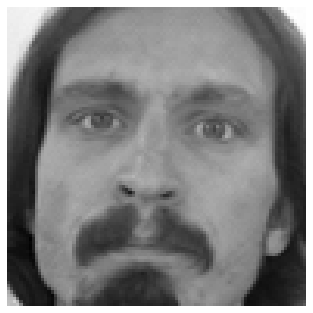

In [79]:
draw(img[0])

In [23]:
data[0]

array([66, 39, 30, 36, 59, 39, 73, 39, 36, 37, 23, 37, 56, 29, 80, 32, 40,
       29, 16, 29, 44, 57, 61, 79, 28, 77, 43, 72, 43, 84])

In [81]:
#function for showing the key features

def key_point_draw(im,p):
    img=im.reshape((96,96))
    for i in range(0,30,2):
        x=int(p[i])
        y=int(p[i+1])
        
        img[y,x]=0
        
    #plt.imshow(img,cmap='gray')
    #plt.show()
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.show()
    

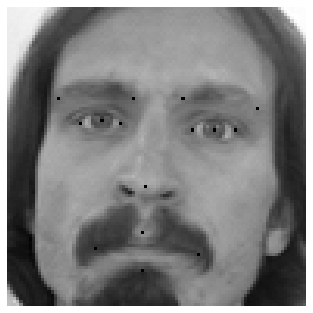

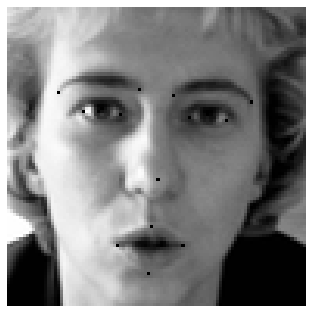

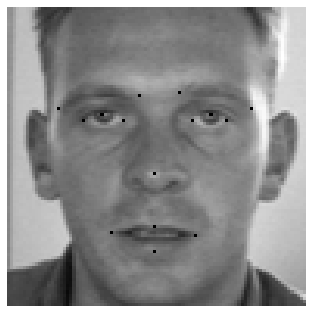

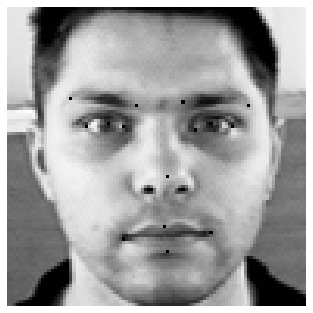

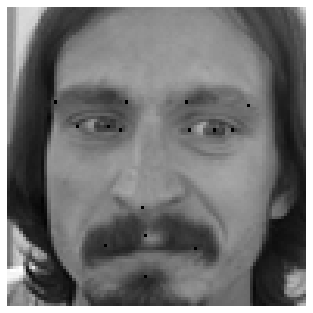

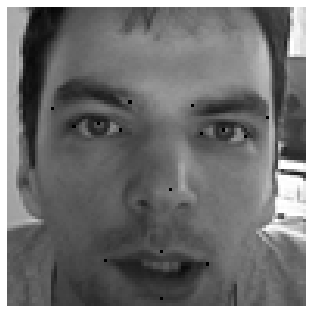

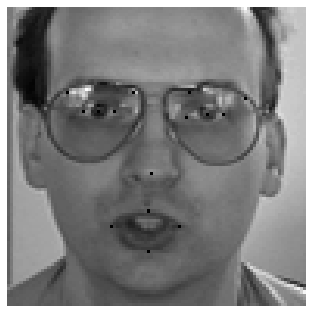

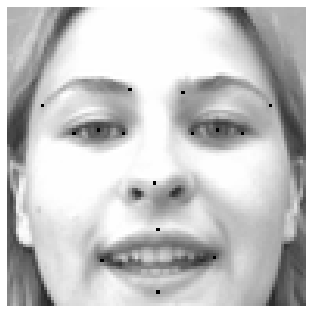

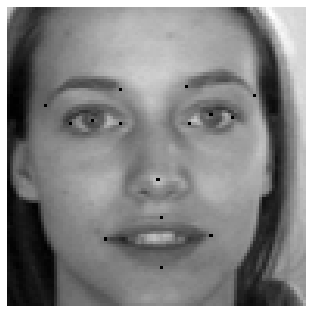

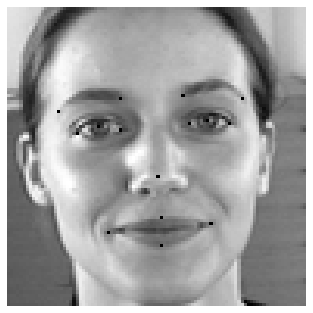

In [82]:
for i in range(10):
    key_point_draw(img[i],data[i])

In [93]:
img=img.reshape((-1,96,96,1))

In [27]:
### Model Architecture

In [28]:

model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(96,96,1)))
model.add(MaxPooling2D(2,2))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Conv2D(64,(3,3)))
model.add(MaxPooling2D(2,2))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Conv2D(64,(3,3)))
model.add(Conv2D(64,(3,3)))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(96,(3,3)))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3)))
model.add(Conv2D(128,(3,3)))
model.add(Conv2D(128,(3,3)))
model.add(LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(30))

In [29]:
#using callbacks
from keras.callbacks import ModelCheckpoint
cb=ModelCheckpoint(monitor='val_accuracy',save_best_only=True,filepath='model_best2.h5')

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 47, 47, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 43, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)       

In [31]:
from keras.optimizers import Adam
adam=Adam(learning_rate=0.0001)
model.compile(loss='mse',optimizer=adam,metrics=["accuracy"])

In [32]:
his=model.fit(img,data,epochs=25,batch_size=128,validation_split=0.25,shuffle=True,callbacks=[cb])

Train on 5286 samples, validate on 1763 samples
Epoch 1/25
5286/5286 [==============================] - 24s 5ms/step - loss: 2523.1036 - accuracy: 1.8918e-04 - val_loss: 2466.3807 - val_accuracy: 0.0000e+00
Epoch 2/25
5286/5286 [==============================] - 16s 3ms/step - loss: 1820.4206 - accuracy: 0.0000e+00 - val_loss: 1065.0068 - val_accuracy: 0.0000e+00
Epoch 3/25
5286/5286 [==============================] - 16s 3ms/step - loss: 546.8097 - accuracy: 0.0013 - val_loss: 177.3598 - val_accuracy: 0.0000e+00
Epoch 4/25
5286/5286 [==============================] - 16s 3ms/step - loss: 86.3038 - accuracy: 0.0306 - val_loss: 45.2277 - val_accuracy: 0.2995
Epoch 5/25
5286/5286 [==============================] - 16s 3ms/step - loss: 24.2288 - accuracy: 0.5984 - val_loss: 40.9090 - val_accuracy: 0.6999
Epoch 6/25
5286/5286 [==============================] - 16s 3ms/step - loss: 18.3346 - accuracy: 0.6156 - val_loss: 100.2757 - val_accuracy: 0.6999
Epoch 7/25
5286/5286 [=================

In [33]:
his.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

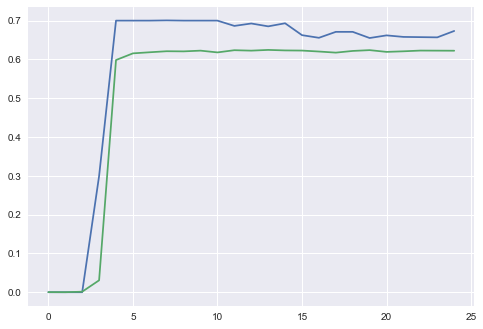

In [34]:
plt.style.use("seaborn")
plt.plot(his.history['val_accuracy'])
plt.plot(his.history['accuracy'])
plt.show()

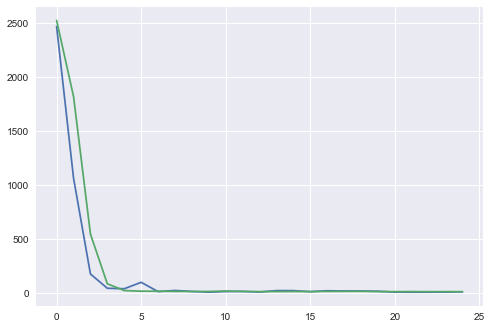

In [235]:
plt.plot(his.history['val_loss'])
plt.plot(his.history['loss'])
plt.show()